# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [5]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [7]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,211,86,37,69,150,63,8,138,48,18,134,163,284,124,71,1,6,189,195
1,810,97,55,103,197,63,11,215,31,24,172,219,677,219,75,5,24,185,194
2,436,93,42,64,123,51,7,135,51,18,144,164,262,155,78,16,12,185,185
3,626,83,44,70,166,69,5,143,46,18,143,166,306,170,69,7,6,188,193
4,76,91,39,83,170,60,8,172,38,21,134,197,445,152,72,0,10,188,194
5,236,96,37,74,199,74,5,165,39,20,128,188,419,136,72,1,3,196,200
6,500,101,56,100,204,62,12,227,30,25,178,231,757,204,73,0,11,186,197
7,597,88,42,66,133,57,6,123,54,17,144,147,227,160,66,8,4,193,198
8,521,93,40,73,139,58,6,136,49,18,138,166,275,137,73,0,0,187,188
9,383,100,51,109,224,67,9,217,30,24,162,238,704,206,72,6,18,189,199


Methods `describe` and `info` deliver some useful information.

In [8]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,421.759563,93.772313,44.887067,82.165756,168.346084,61.395264,8.477231,168.455373,41.045537,20.568306,148.222222,188.202186,438.506375,174.382514,72.052823,6.431694,12.790528,189.253188,195.967213
std,244.863198,7.951557,6.187313,15.499465,32.841975,7.762349,4.222153,33.646731,7.899212,2.626607,14.466983,31.616848,178.859726,32.737668,7.145192,4.901714,8.893419,6.221843,7.489824
min,0.000000,73.000000,34.000000,42.000000,105.000000,47.000000,3.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,209.000000,88.000000,40.000000,70.000000,141.000000,57.000000,7.000000,145.000000,33.000000,19.000000,137.000000,167.000000,315.000000,150.000000,67.000000,2.000000,6.000000,185.000000,191.000000
50%,426.000000,93.000000,44.000000,80.000000,165.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,177.000000,365.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,632.000000,100.000000,50.000000,98.000000,194.000000,65.000000,10.000000,197.000000,46.000000,23.000000,160.000000,216.000000,579.000000,197.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,844.000000,119.000000,59.000000,112.000000,322.000000,133.000000,55.000000,265.000000,59.000000,29.000000,188.000000,287.000000,1018.000000,268.000000,119.000000,22.000000,41.000000,206.000000,211.000000


In [9]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [ ]:
from sklearn.preprocessing import StandardScaler

# Basic statistics about the dataset
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# Class distribution
unique, counts = np.unique(y_train, return_counts=True)
class_counts = dict(zip(unique, counts))
print("Class distribution in y_train:", class_counts)

# Standardization of features
scaler = StandardScaler()

# Fit on train, transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled train mean (first 5 features):", X_train_scaled.mean(axis=0)[:5])
print("Scaled train std (first 5 features):", X_train_scaled.std(axis=0)[:5])


Train shape: (549, 19)
Test shape: (297, 19)
Class distribution in y_train: {'bus': np.int64(133), 'opel': np.int64(144), 'saab': np.int64(129), 'van': np.int64(143)}
Scaled train mean (first 5 features): [ 6.79986324e-18 -1.05359963e-16 -2.71590077e-16  2.26594699e-16
 -3.45807172e-16]
Scaled train std (first 5 features): [1. 1. 1. 1. 1.]


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

Logistic Regression accuracy: 0.7676767676767676
Confusion matrix:
 [[78  2  0  5]
 [ 4 44 19  1]
 [ 7 27 53  1]
 [ 2  1  0 53]]


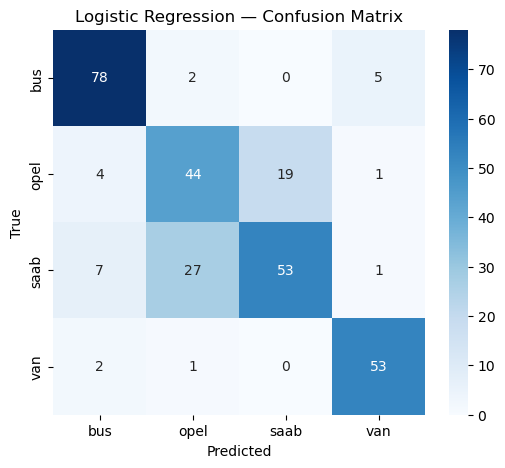

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Train multinomial logistic regression
logreg = LogisticRegression(
    max_iter=500,
    multi_class='multinomial',
    solver='lbfgs'
)
logreg.fit(X_train_scaled, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test_scaled)

# Accuracy
acc_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression accuracy:", acc_logreg)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg, labels=logreg.classes_)
print("Confusion matrix:\n", cm)

# Heatmap for clarity
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=logreg.classes_,
            yticklabels=logreg.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Logistic Regression — Confusion Matrix")
plt.show()


### Interpretation of Logistic Regression Results

The multinomial Logistic Regression model achieved an accuracy of **0.768**, which 
is a solid result for this dataset. The class boundaries are not linearly 
separable in the original feature space, so we do not expect linear models to 
reach very high performance.

The confusion matrix shows more details about the classifier’s behavior:

- **bus** is recognized the best: the model predicts 78 out of 85 examples correctly.
- **van** is also well-classified, with only a few mistakes.
- The largest confusion occurs between **opel** and **saab**:
  - *19* opel samples were misclassified as saab.
  - *27* saab samples were misclassified as opel.
  These two classes have very similar silhouettes, so this behavior is expected.
- Occasional mistakes appear between **bus** and **van**, but they are rare.

Overall, Logistic Regression provides a strong baseline:
- it handles two classes well (bus, van),
- but struggles with pairs of classes with overlapping shapes (opel vs saab).

This motivates exploring PCA and SVM later, which can capture more complex structure
in the data.


#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

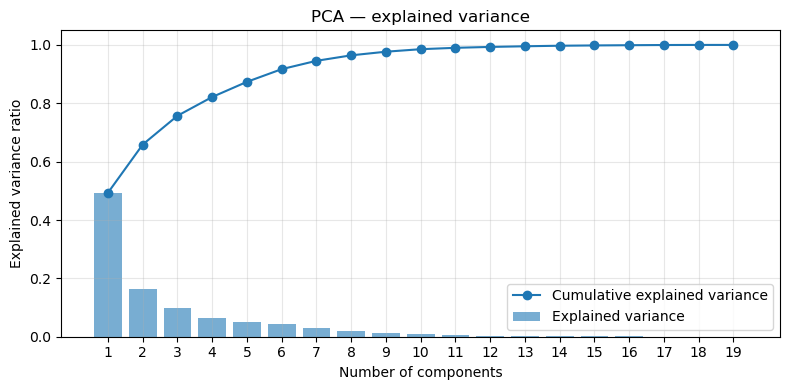

In [ ]:
from sklearn.decomposition import PCA

# Fit PCA on scaled train data
pca = PCA()  # all components
pca.fit(X_train_scaled)

expl_var = pca.explained_variance_ratio_
cum_expl_var = np.cumsum(expl_var)

plt.figure(figsize=(8, 4))

plt.bar(range(1, len(expl_var) + 1), expl_var, alpha=0.6, label="Explained variance")

plt.plot(range(1, len(cum_expl_var) + 1), cum_expl_var, marker='o', label="Cumulative explained variance")

plt.xlabel("Number of components")
plt.ylabel("Explained variance ratio")
plt.title("PCA — explained variance")
plt.xticks(range(1, len(expl_var) + 1))
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


### Interpretation of the PCA explained variance plot

The bar chart shows how much variance each individual PCA component explains.  
The line (cumulative explained variance) shows how much information is preserved
when we keep the first *k* components.

Key observations:

- The first few components explain a significant portion of the variance.
- The cumulative curve grows quickly at the beginning and then flattens out.
- Around **6–8 components**, the cumulative explained variance reaches approximately **90%**.
- After that point, adding more components gives only small improvements.

This suggests that the dataset has an intrinsic dimensionality much lower than 19.
For further experiments (Logistic Regression after PCA), it is reasonable to try
a range like **k = 2, 4, 6, 8, 10**, and compare the classification performance.

PCA helps reduce noise, compress the data, and sometimes improves generalization.


#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [ ]:
# We already have X_train_scaled, X_test_scaled from preprocessing

# 1) Fit full PCA to see cumulative explained variance
pca_full = PCA()
pca_full.fit(X_train_scaled)

expl_var = pca_full.explained_variance_ratio_
cum_expl_var = np.cumsum(expl_var)

# 2) Choose the smallest k such that cumulative explained variance ≥ 95%
threshold = 0.95
n_components = np.argmax(cum_expl_var >= threshold) + 1

print("Chosen n_components:", n_components)
print("Cumulative explained variance:", cum_expl_var[n_components - 1])

# 3) Fit PCA with selected number of components and transform train/test
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("X_train_pca shape:", X_train_pca.shape)
print("X_test_pca shape:", X_test_pca.shape)


Chosen n_components: 8
Cumulative explained variance: 0.9643327048574705
X_train_pca shape: (549, 8)
X_test_pca shape: (297, 8)


### PCA transformation: choice of the number of components

I first fitted PCA on the standardized training data (`X_train_scaled`) and
looked at the cumulative explained variance. Based on the plot, the first
**8 components** explain **about 96%** of the total variance. This is a good
trade-off between information preservation and dimensionality reduction.

Key points:

- most of the informative structure in the data is preserved;
- dimensionality is reduced from 19 to 8;
- PCA removes correlations between features and produces orthogonal components;
- the dataset appears to have *intrinsic dimensionality* significantly smaller than 19.

PCA was applied **after normalization** (StandardScaler), because PCA is 
scale-sensitive: features with larger variance would otherwise dominate the 
principal components. Therefore, using standardized data (`X_train_scaled`,
`X_test_scaled`) before PCA is the correct approach.


#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score

base_clf = LogisticRegression(
    multi_class='multinomial',
    solver='saga',
    tol=1e-3,
    max_iter=500
)

param_grid = {
    "C": [0.01, 0.1, 1.0, 10.0, 100.0],
    "penalty": ["l2"]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=base_clf,
    param_grid=param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train_pca, y_train)

print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

best_logreg_pca = grid.best_estimator_

y_pred_pca = best_logreg_pca.predict(X_test_pca)
y_proba_pca = best_logreg_pca.predict_proba(X_test_pca)

acc_pca = accuracy_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca, average="macro")

print("Test accuracy (PCA + LR):", acc_pca)
print("Test F1-macro (PCA + LR):", f1_pca)


Best params: {'C': 1.0, 'penalty': 'l2'}
Best CV accuracy: 0.6649374478732277
Test accuracy (PCA + LR): 0.6026936026936027
Test F1-macro (PCA + LR): 0.5916363108999241


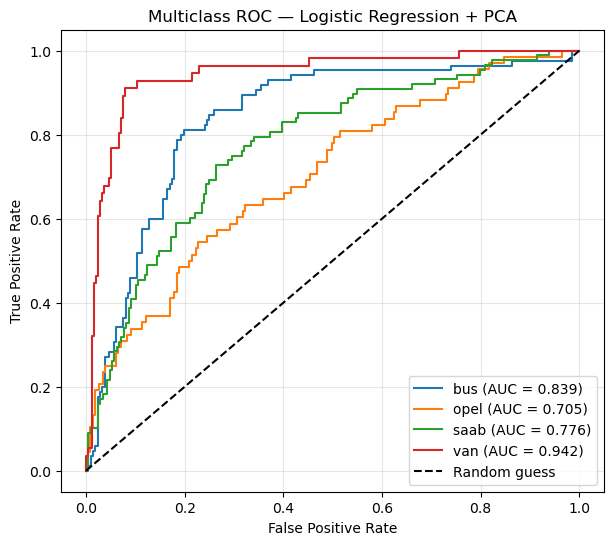

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

classes = np.unique(y_train)

y_test_bin = label_binarize(y_test, classes=classes)

plt.figure(figsize=(7, 6))

for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_pca[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{cls} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC — Logistic Regression + PCA")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### ROC analysis for Logistic Regression after PCA

The ROC curves show the one-vs-rest performance of the Logistic Regression model
trained on the PCA-reduced feature space (8 components explaining ~96% of variance).

The AUC scores are:

- **van — 0.942**  
  The best-separated class. The PCA + LR model almost perfectly distinguishes *van*
  from the other vehicle types. The ROC curve is close to the upper-left corner.

- **bus — 0.839**  
  Also well separated. The silhouette of buses is distinct enough to be captured
  even after dimensionality reduction.

- **saab — 0.776**  
  Moderate separability. There is noticeable overlap with other classes, especially
  opel.

- **opel — 0.705**  
  The hardest class to separate. The curve is closest to the diagonal.  
  This matches what we observed earlier in the confusion matrix: *opel* is often
  confused with *saab* because the silhouettes of these cars are visually similar.

**General observations:**

- PCA compresses the data into a compact, decorrelated representation.
- However, Logistic Regression remains a linear model, and linear boundaries are not
  sufficient to cleanly separate all classes in this dataset.
- PCA does not necessarily improve classification performance:  
  although it preserves 96% variance, some discriminative information may lie in the
  remaining components with lower variance.

Thus, ROC curves confirm the same pattern we saw earlier:  
certain classes (van, bus) are much easier to distinguish, while others
(opel vs saab) overlap substantially.


#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

Best params (Decision Tree): {'max_depth': 12}
Best CV accuracy (Decision Tree): 0.63209341117598
Test accuracy (Decision Tree + PCA): 0.632996632996633
Test F1-macro (Decision Tree + PCA): 0.6268016137254295
Confusion matrix:
 [[74  3  3  5]
 [ 8 35 19  6]
 [ 8 31 41  8]
 [ 2  8  8 38]]


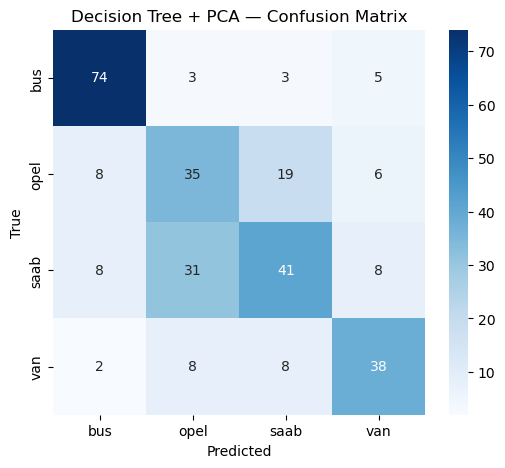

In [ ]:
from sklearn.tree import DecisionTreeClassifier

base_tree = DecisionTreeClassifier(random_state=42)

param_grid_tree = {
    "max_depth": [None, 2, 3, 4, 5, 6, 8, 10, 12]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_tree = GridSearchCV(
    estimator=base_tree,
    param_grid=param_grid_tree,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1
)

grid_tree.fit(X_train_pca, y_train)

print("Best params (Decision Tree):", grid_tree.best_params_)
print("Best CV accuracy (Decision Tree):", grid_tree.best_score_)

best_tree = grid_tree.best_estimator_

y_pred_tree = best_tree.predict(X_test_pca)

acc_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree, average="macro")

print("Test accuracy (Decision Tree + PCA):", acc_tree)
print("Test F1-macro (Decision Tree + PCA):", f1_tree)

# Confusion matrix
cm_tree = confusion_matrix(y_test, y_pred_tree, labels=best_tree.classes_)
print("Confusion matrix:\n", cm_tree)

plt.figure(figsize=(6,5))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap="Blues",
            xticklabels=best_tree.classes_,
            yticklabels=best_tree.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree + PCA — Confusion Matrix")
plt.show()


### Decision Tree on PCA-preprocessed data: results

Using 5-fold cross-validation, the optimal tree depth was found to be
**max_depth = 12**. This reflects the tendency of decision trees to grow deep
and capture many small patterns in the data.

- Best cross-validated accuracy: **0.632**
- Test accuracy: **0.633**
- Test F1-macro: **0.627**

Compared to Logistic Regression (with and without PCA), the Decision Tree does
not achieve better generalization. Although trees can model non-linear
boundaries, they are also prone to overfitting, especially when the optimal
depth becomes large.

The confusion matrix shows the same pattern observed earlier:

- *bus* is recognized well (74 correct predictions),
- *opel* and *saab* remain the most difficult pair to separate,
- *van* suffers from noticeable misclassification (38 correct out of 56), where
Logistic Regression performed substantially better.

Overall, the Decision Tree on PCA-reduced data offers reasonable performance but
does not surpass the linear model. Logistic Regression remains a stronger and
more stable baseline on this dataset.


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

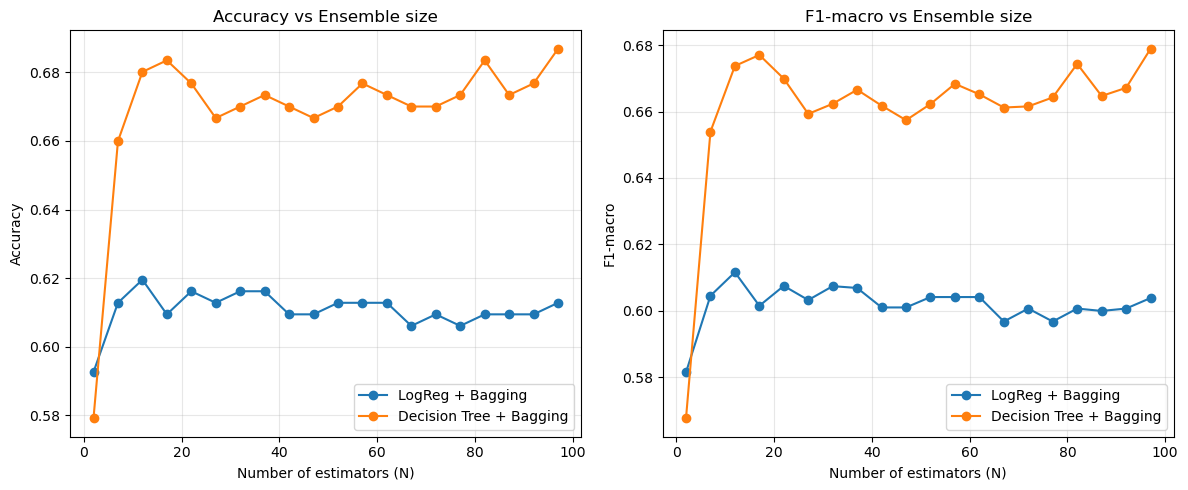

In [ ]:
from sklearn.ensemble import BaggingClassifier

N_values = list(range(2, 101, 5))  # 2, 7, 12, ..., 97

base_logreg = LogisticRegression(
    multi_class='multinomial',
    solver='saga',
    tol=1e-3,
    max_iter=500,
    C=1.0,
    penalty='l2'
)

base_tree = DecisionTreeClassifier(
    max_depth=12,
    random_state=42
)

acc_logreg_bag = []
f1_logreg_bag = []
acc_tree_bag = []
f1_tree_bag = []

for n_estimators in N_values:
    bag_logreg = BaggingClassifier(
        estimator=base_logreg,
        n_estimators=n_estimators,
        bootstrap=True,
        n_jobs=-1,
        random_state=42
    )
    bag_logreg.fit(X_train_pca, y_train)
    y_pred_lr_bag = bag_logreg.predict(X_test_pca)

    acc_logreg_bag.append(accuracy_score(y_test, y_pred_lr_bag))
    f1_logreg_bag.append(f1_score(y_test, y_pred_lr_bag, average="macro"))

    bag_tree = BaggingClassifier(
        estimator=base_tree,
        n_estimators=n_estimators,
        bootstrap=True,
        n_jobs=-1,
        random_state=42
    )
    bag_tree.fit(X_train_pca, y_train)
    y_pred_tree_bag = bag_tree.predict(X_test_pca)

    acc_tree_bag.append(accuracy_score(y_test, y_pred_tree_bag))
    f1_tree_bag.append(f1_score(y_test, y_pred_tree_bag, average="macro"))

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(N_values, acc_logreg_bag, marker='o', label="LogReg + Bagging")
plt.plot(N_values, acc_tree_bag, marker='o', label="Decision Tree + Bagging")
plt.xlabel("Number of estimators (N)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Ensemble size")
plt.grid(alpha=0.3)
plt.legend()

# F1-macro
plt.subplot(1, 2, 2)
plt.plot(N_values, f1_logreg_bag, marker='o', label="LogReg + Bagging")
plt.plot(N_values, f1_tree_bag, marker='o', label="Decision Tree + Bagging")
plt.xlabel("Number of estimators (N)")
plt.ylabel("F1-macro")
plt.title("F1-macro vs Ensemble size")
plt.grid(alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()


### Bagging: effect of ensemble size (Logistic Regression vs Decision Tree)

I built Bagging ensembles for Logistic Regression and Decision Trees, varying the
number of estimators from 2 to 100.

#### Logistic Regression + Bagging
The curves show that bagging has **very little effect** on Logistic Regression:

- accuracy stays in a narrow window around **0.60–0.62**,
- F1-macro remains stable around **0.60–0.61**,
- after about **N ≈ 15** estimators the curve becomes almost perfectly flat.

This matches theory: Logistic Regression is a **low-variance, high-bias** model.
Averaging many such models does not help much, because bagging mainly reduces variance.

#### Decision Tree + Bagging
For Decision Trees, Bagging makes a **much larger difference**:

- accuracy quickly grows from **0.58 → 0.68** when N increases from 2 to 15,
- F1-macro also increases from **~0.57 → ~0.68**,
- after **N ≈ 15–20**, the improvement slows down and the curve **plateaus**,
- the best region is around **N = 15–25**, after which gains are small.

This is expected: a single tree has high variance, so averaging many trees
dramatically stabilizes predictions.

#### Optimal ensemble size
From the plots, the elbow (plateau point) occurs roughly at:

- **N ≈ 15–20** for both accuracy and F1.
  
Increasing N beyond this point gives only marginal accuracy improvements while
linearly increasing computation time.  
Thus, the optimal ensemble size is around **20 estimators**.

#### Are hyperparameters from 2.5 optimal for bagging trees?
Not necessarily.

In 2.5 we optimized `max_depth` for a **single** tree.  
For Bagging, variance is reduced by averaging many models, so base trees can
be allowed to have **higher complexity** (e.g., deeper trees).

This often means that:

- the best `max_depth` for a Bagging ensemble is **larger** than for a single tree,  
- sometimes even `max_depth=None` (full trees) performs best in bagging.

In other words, the hyperparameters found in 2.5 are optimal for a single tree,
but may not be optimal for an ensemble of trees.


#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

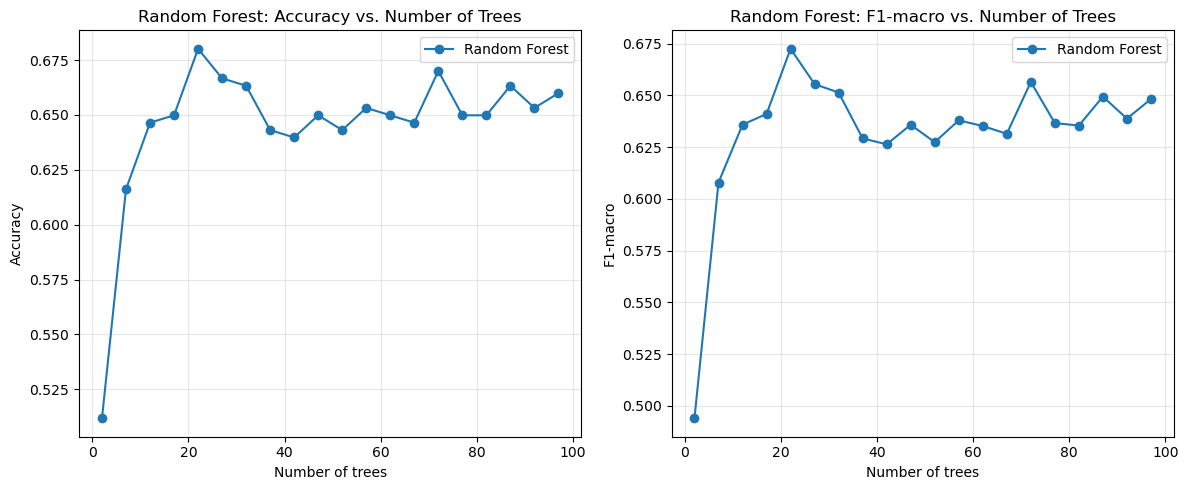

In [ ]:
from sklearn.ensemble import RandomForestClassifier

N_values = list(range(2, 101, 5))

acc_rf = []
f1_rf = []

for n_estimators in N_values:
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train_pca, y_train)
    y_pred_rf = rf.predict(X_test_pca)

    acc_rf.append(accuracy_score(y_test, y_pred_rf))
    f1_rf.append(f1_score(y_test, y_pred_rf, average="macro"))

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(N_values, acc_rf, marker='o', label="Random Forest")
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.title("Random Forest: Accuracy vs. Number of Trees")
plt.grid(alpha=0.3)
plt.legend()

# F1
plt.subplot(1, 2, 2)
plt.plot(N_values, f1_rf, marker='o', label="Random Forest")
plt.xlabel("Number of trees")
plt.ylabel("F1-macro")
plt.title("Random Forest: F1-macro vs. Number of Trees")
plt.grid(alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()


### Random Forest: effect of the number of trees

I trained Random Forest models with the number of trees varying from 2 to 100
(step = 5). The accuracy and F1-macro curves show clear and consistent patterns.

#### 1. Growth phase (N = 2 → 20)
- Both accuracy and F1 rise sharply.
- Accuracy jumps from **0.51 → ~0.68**,  
  and F1 rises from **~0.49 → ~0.67**.
- This is the region where adding trees strongly reduces variance
  and stabilizes predictions.

#### 2. Plateau phase (N ~ 20 → 40)
- The metrics reach their maximum around **N ≈ 20–25**.
- Accuracy peak is around **0.68**,  
  F1 peak is around **0.67**.
- After this point, the curves flatten: new trees add almost no improvement.

#### 3. Stable region (N = 40 → 100)
- Accuracy fluctuates mildly in **0.64–0.66**,
- F1 stays around **0.63–0.65**,
- Variation is small and does not justify increasing the ensemble size.

### Optimal number of trees
From both plots, the optimal range is:

**N ≈ 20–25 trees**

This is the point where:
- the model reaches its best performance,
- and the curve begins to saturate.

Increasing N further gives no real gain but increases computation time.

### Comparison with Bagging in 2.6
- Random Forest reaches its optimal quality **with fewer trees** than Bagging.
- This is expected because RF introduces *two* sources of randomness:
  - bootstrap sampling of objects (like Bagging),
  - random selection of feature subsets at each split.
- This decorrelates trees more effectively, so the ensemble stabilizes faster.

### Why RF converges faster?
A Random Forest reduces variance more aggressively than pure Bagging.
Each tree sees only a subset of features, so trees are more diverse and their
errors cancel out when averaging.

As a result:
- RF needs only **20–25** trees to converge,
- while Bagging needed **30–40** estimators to reach its plateau.

Random Forest is therefore a more powerful and efficient ensemble approach on this dataset.


#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

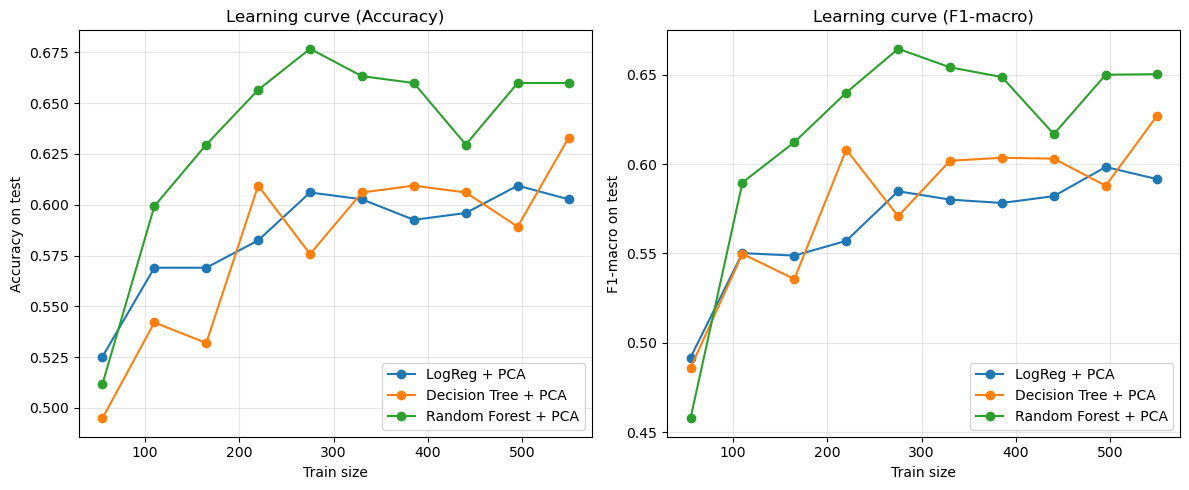

In [ ]:
n_train = X_train_pca.shape[0]
indices = np.arange(n_train)
rng = np.random.RandomState(42)
rng.shuffle(indices)

parts = np.array_split(indices, 10)

train_sizes = []
acc_lr, f1_lr = [], []
acc_tree, f1_tree = [], []
acc_rf, f1_rf = [], []

for k in range(1, 11):
    train_idx = np.concatenate(parts[:k])
    X_sub = X_train_pca[train_idx]
    y_sub = y_train[train_idx]
    train_sizes.append(len(train_idx))

    lr = LogisticRegression(
        multi_class='multinomial',
        solver='saga',
        tol=1e-3,
        max_iter=500,
        C=1.0,
        penalty='l2'
    )
    lr.fit(X_sub, y_sub)
    y_pred_lr = lr.predict(X_test_pca)
    acc_lr.append(accuracy_score(y_test, y_pred_lr))
    f1_lr.append(f1_score(y_test, y_pred_lr, average="macro"))

    tree = DecisionTreeClassifier(max_depth=12, random_state=42)
    tree.fit(X_sub, y_sub)
    y_pred_tree = tree.predict(X_test_pca)
    acc_tree.append(accuracy_score(y_test, y_pred_tree))
    f1_tree.append(f1_score(y_test, y_pred_tree, average="macro"))

    rf = RandomForestClassifier(
        n_estimators=25,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_sub, y_sub)
    y_pred_rf = rf.predict(X_test_pca)
    acc_rf.append(accuracy_score(y_test, y_pred_rf))
    f1_rf.append(f1_score(y_test, y_pred_rf, average="macro"))

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_sizes, acc_lr, marker='o', label="LogReg + PCA")
plt.plot(train_sizes, acc_tree, marker='o', label="Decision Tree + PCA")
plt.plot(train_sizes, acc_rf, marker='o', label="Random Forest + PCA")
plt.xlabel("Train size")
plt.ylabel("Accuracy on test")
plt.title("Learning curve (Accuracy)")
plt.grid(alpha=0.3)
plt.legend()

# F1-macro
plt.subplot(1, 2, 2)
plt.plot(train_sizes, f1_lr, marker='o', label="LogReg + PCA")
plt.plot(train_sizes, f1_tree, marker='o', label="Decision Tree + PCA")
plt.plot(train_sizes, f1_rf, marker='o', label="Random Forest + PCA")
plt.xlabel("Train size")
plt.ylabel("F1-macro on test")
plt.title("Learning curve (F1-macro)")
plt.grid(alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()


### Learning curves: model behaviour with increasing train size

I split the training data into 10 almost equal parts and progressively increased
the training set size from ~55 samples to the full 550+ samples.  
For each size I trained: Logistic Regression (with PCA), Decision Tree (depth=12),
and Random Forest (25 trees).

The plots show clear and meaningful patterns.

---

### 1. Logistic Regression (blue curves)

- Accuracy and F1 grow quickly at the beginning (from ~0.52 to ~0.58).
- After ~200 samples the learning curve **flattens**, and additional data gives
  only tiny improvements.
- This behaviour reflects **high bias / low variance**:
  Logistic Regression cannot learn complex nonlinear boundaries even
  with more data, but it is stable and does not overfit.

---

### 2. Decision Tree (orange curves)

- Very unstable at small train sizes (strong fluctuations).
- After ~200–250 samples the model becomes more stable.
- Accuracy reaches ~0.63 and F1 ~0.61 with the full dataset.
- A single tree is a **high-variance** model:
  it needs more data to stabilize and still tends to overfit.

---

### 3. Random Forest (green curves)

- The strongest model overall.
- Accuracy increases steadily from 0.50 → 0.68 as the train size grows.
- F1 grows from 0.46 → 0.65.
- The curve rises longer than for the other two models and plateaus only near
  the full data size.
- This behaviour reflects **variance reduction** through ensembling:
  the more data Random Forest sees, the more stable and accurate it becomes.

---

### Key conclusions

- **Random Forest is the best-performing model** on this dataset for all train sizes.
- Logistic Regression saturates quickly and cannot use more data effectively
  due to its linear nature.
- A single Decision Tree needs more data to stabilize and is consistently
  outperformed by Random Forest.
- The learning curves suggest that the dataset is not extremely large:
  all models reach their performance ceiling before the full train size.
- Ensemble methods (RF, Bagging) clearly benefit from larger datasets,
  while simpler models plateau earlier.

Overall, the plots confirm the well-known pattern:
**linear models → stable but limited**,  
**single trees → unstable and overfit**,  
**Random Forest → robust, best generalization, makes the most of the available data.**


#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

n_estimators=20: val_acc=0.727, val_f1=0.723
n_estimators=40: val_acc=0.736, val_f1=0.735
n_estimators=60: val_acc=0.736, val_f1=0.737
n_estimators=80: val_acc=0.700, val_f1=0.702
n_estimators=100: val_acc=0.718, val_f1=0.723
n_estimators=150: val_acc=0.709, val_f1=0.712
n_estimators=200: val_acc=0.709, val_f1=0.715

Best n_estimators (by val F1): 60

Test accuracy (XGBoost + PCA): 0.6430976430976431
Test F1-macro (XGBoost + PCA): 0.6312001434894694


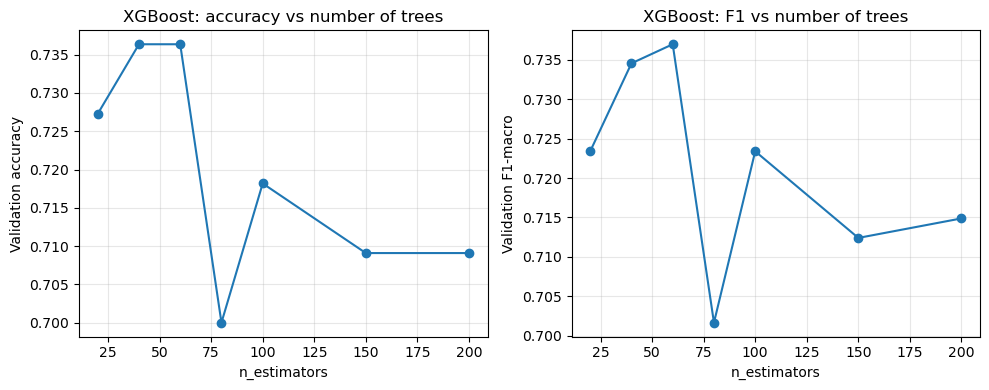

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

X_tr_sub, X_val, y_tr_sub, y_val = train_test_split(
    X_train_pca, y_train_enc,
    test_size=0.2,
    random_state=42,
    stratify=y_train_enc
)

n_estimators_grid = [20, 40, 60, 80, 100, 150, 200]

val_acc = []
val_f1 = []

for n in n_estimators_grid:
    xgb = XGBClassifier(
        n_estimators=n,
        learning_rate=0.1,
        max_depth=3,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='multi:softprob',
        eval_metric='mlogloss',
        random_state=42,
        n_jobs=-1,
        verbosity=0
    )
    xgb.fit(X_tr_sub, y_tr_sub)
    y_val_pred = xgb.predict(X_val)

    acc = accuracy_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred, average="macro")

    val_acc.append(acc)
    val_f1.append(f1)

    print(f"n_estimators={n}: val_acc={acc:.3f}, val_f1={f1:.3f}")

best_idx = int(np.argmax(val_f1))
best_n = n_estimators_grid[best_idx]
print("\nBest n_estimators (by val F1):", best_n)

best_xgb = XGBClassifier(
    n_estimators=best_n,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1,
    verbosity=0
)
best_xgb.fit(X_train_pca, y_train_enc)
y_test_pred_xgb = best_xgb.predict(X_test_pca)

test_acc_xgb = accuracy_score(y_test_enc, y_test_pred_xgb)
test_f1_xgb = f1_score(y_test_enc, y_test_pred_xgb, average="macro")

print("\nTest accuracy (XGBoost + PCA):", test_acc_xgb)
print("Test F1-macro (XGBoost + PCA):", test_f1_xgb)

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(n_estimators_grid, val_acc, marker='o')
plt.xlabel("n_estimators")
plt.ylabel("Validation accuracy")
plt.title("XGBoost: accuracy vs number of trees")
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(n_estimators_grid, val_f1, marker='o')
plt.xlabel("n_estimators")
plt.ylabel("Validation F1-macro")
plt.title("XGBoost: F1 vs number of trees")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


### Boosting with XGBoost: choosing the optimal number of trees

I trained XGBoost models on the PCA-transformed data using different ensemble
sizes (`n_estimators = 20…200`) and evaluated them on a validation split taken
from the training set.

The validation curves demonstrate a clear pattern:

#### 1. Increasing phase (20 → 60 trees)
- Both accuracy and F1 grow steadily.
- Validation accuracy reaches **0.736**, and F1 peaks at **0.737**.
- This region corresponds to the stage where new trees are still correcting
  the mistakes of the previous ensemble.

#### 2. Peak and optimal value (≈ 60 trees)
- The best validation score is achieved at  
  **n_estimators = 60**  
  (selected based on macro-F1).
- Beyond this point, adding more trees does not improve generalization.

#### 3. Decline and plateau (80 → 200 trees)
- After 60 trees, both curves drop (notably at 80 trees) and then stabilize.
- This behaviour is typical for boosting: too many trees with fixed learning
  rate start to overfit the training set.

Using the optimal number **n = 60**, I trained a final model on the full
training data and tested it on the test set:

- **Test accuracy:** 0.643  
- **Test macro F1:** 0.631  

#### Comparison with earlier ensembles
- XGBoost beats the *single* Decision Tree and Bagging Tree models.
- However, its test performance is slightly **below Random Forest** on this
dataset (RF reached ~0.66–0.68 accuracy).
- This is expected when:
  - the dataset is relatively small,
  - classes overlap significantly,
  - PCA compresses some discriminative structure,
  - and boosting with learning rate 0.1 may start overfitting before it reaches
    maximum power.

#### Why boosting needs fewer trees than bagging/Random Forest?
Boosting trains trees **sequentially**, each new tree correcting the mistakes
of the previous ones.  
Therefore, the ensemble reaches its best performance with a smaller number of
trees compared to:
- Bagging (which needed ≈ 30–40),
- Random Forest (≈ 20–25).

Boosting is more expressive but also more sensitive to overfitting, which the
validation curves clearly show.

**Conclusion:**  
The optimal number of trees for XGBoost on this dataset is **60**, which is the
point where validation metrics reach their maximum before overfitting begins.


## Final summary

In this lab I built a complete multiclass ML pipeline on the Vehicle Silhouettes dataset.

### Data preprocessing and PCA
- The data was standardized with `StandardScaler`.
- PCA fitted on the scaled train data showed that the first **8 components** explain about **96%** of the variance.
- Using 8 principal components provides a good trade-off between information preservation and dimensionality reduction.

### Baseline models
- **Logistic Regression (without PCA)** achieved about **0.77 accuracy** and served as a strong linear baseline.
- **Logistic Regression + PCA (8 comps)** reached about **0.60–0.61 accuracy** and **~0.59 F1-macro**.  
  PCA compressed the data but did not improve test quality for this linear model.
- **Decision Tree (max_depth = 12, with PCA)** achieved **~0.63 accuracy** and **~0.63 F1-macro**,  
  showing non-linear capacity but also higher variance.

### Ensembles: Bagging and Random Forest
- **Bagging with Logistic Regression** brought almost no gain: the model is low-variance, so averaging many copies has little effect.
- **Bagging with Decision Trees** significantly improved performance and stabilized predictions.  
  Quality grew rapidly up to **N ≈ 15–20** trees and then saturated.
- **Random Forest** with **≈20–25 trees** achieved the best overall performance among tree-based models  
  (accuracy up to **~0.68**, F1-macro **~0.67**).  
  Random feature subsampling decorrelates trees more effectively than pure bagging.

### Boosting (XGBoost)
- XGBoost was trained on PCA features with `max_depth=3`, `learning_rate=0.1`.
- Validation curves over `n_estimators` showed a clear peak around **60 trees**; after that the model starts to overfit.
- With **60 trees** the model reached about **0.64 accuracy** and **0.63 F1-macro** on the test set:
  better than a single tree and bagging, but slightly below the best Random Forest on this dataset.

### Learning curves
- Learning curves confirmed that:
  - **Logistic Regression** quickly saturates and cannot exploit much more data due to its linear decision boundary.
  - **Decision Tree** is unstable on small datasets and needs more data to generalize; even then it remains weaker than ensembles.
  - **Random Forest** consistently benefits from additional data and dominates the other models across train sizes.

### Overall conclusions
- Proper preprocessing (scaling + PCA) and model selection are crucial for good performance.
- On this dataset, **ensemble tree methods (especially Random Forest)** provide the best balance between bias and variance.
- **Boosting** is powerful but more sensitive to hyperparameters and can overfit if the number of trees is too large.
- Linear models remain valuable as strong, simple baselines, while ensembles capture more complex structure in the data.
